In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("archive/Train.csv")

In [3]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [5]:
df["text"][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [6]:
df.shape

(40000, 2)

In [7]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [9]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2913e9d7a10>,
 [Text(-0.0016414449704779373, 1.0999987752985951, 'positive'),
  Text(0.0016414449704778024, -1.0999987752985951, 'negative')],
 [Text(-0.000895333620260693, 0.5999993319810518, '50.05'),
  Text(0.0008953336202606195, -0.5999993319810518, '49.95')])

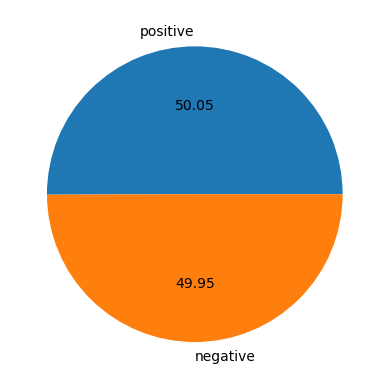

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['positive','negative'],autopct='%0.2f')

# 3 Data pre processing
### Lower casing,

In [12]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
POS = PorterStemmer()

In [13]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(POS.stem(i))
    
            
    
    return " ".join(y)


In [14]:
transform_text('hi how are you dncing dipesh? loving')

'hi dncing dipesh love'

In [15]:
df['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [16]:
transform_text('I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.')

'grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'

In [17]:
df['transformed_text']=df['text'].apply(transform_text)

In [18]:
df

,text,label,transformed_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 1965 watch love thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,peopl know particular time past like feel need...
3,Even though I have great interest in Biblical ...,0,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad armi fan noth ever chang got t...
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,western union someth forgotten classic western...
39996,This movie is an incredible piece of work. It ...,1,movi incred piec work explor everi nook cranni...
39997,My wife and I watched this movie because we pl...,0,wife watch movi plan visit sicili stromboli so...
39998,"When I first watched Flatliners, I was amazed....",1,first watch flatlin amaz necessari featur good...


# Model Building

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [20]:
x = tfidf.fit_transform(df['transformed_text'])

In [21]:
x

<40000x62554 sparse matrix of type '<class 'numpy.float64'>'
	with 3631784 stored elements in Compressed Sparse Row format>

In [22]:
y=df['label'].values

In [23]:
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [25]:
x_train

<28000x62554 sparse matrix of type '<class 'numpy.float64'>'
	with 2546093 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [27]:
from sklearn.linear_model import LogisticRegressionCV


In [28]:
gnb = GaussianNB()
mub = MultinomialNB()
bnb = BernoulliNB()
log=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500)


In [29]:
# gnb.fit(x_train,y_train)
# y_pred1 = gnb.predict(x_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [30]:
log.fit(x_train,y_train)
y_pred2 = log.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   45.8s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   46.6s finished


0.8864166666666666
[[5225  769]
 [ 594 5412]]
0.8755864746804725


In [31]:
mub.fit(x_train,y_train)
y_pred3 = mub.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8545
[[5194  800]
 [ 946 5060]]
0.863481228668942


In [32]:
bnb.fit(x_train,y_train)
y_pred4 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8401666666666666
[[5250  744]
 [1174 4832]]
0.866571018651363


In [33]:
def prediction(comment):
    preprocessed_comment = transform_text(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    pred = log.predict(comment_vector)[0]
    if pred == 1:
        return "Posative comment"
    else:
        return "Negative comment"
        


In [34]:
pred = prediction('bad')
pred

'Negative comment'

In [35]:
import gradio as gr

ImportError: cannot import name 'Doc' from 'typing_extensions' (C:\Users\Dipesh\anaconda3\Lib\site-packages\typing_extensions.py)

In [ ]:
interface = gr.Interface(fn=prediction,inputs=gr.Textbox(lines=5,placeholder="comment"),outputs="text")

In [ ]:
interface.launch(share=True)

In [ ]:
# import pickle
# pickle.dump(log,open('log.pkl','wb'))
# pickle.dump(tfidf,open('vectarizor.pkl','wb'))